In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0299-09.uvel.nc')
plotvaru = datau.variables['uvel'][0,:,:]
lontu = datau.variables['ULON'][:,:]
lattu = datau.variables['ULAT'][:,:]
plotvaru[plotvaru == 0.0] = np.nan
plotvaru[plotvaru >  1000] = np.nan

In [3]:
lattu[300,1]

-65.77318

In [4]:
###### (u2-u1)/(y2-y1)
a = np.arange(0,600)
A1= np.zeros([600,3600])
for i in a:
    A1[i,:] = (plotvaru[i+1,:]-plotvaru[i,:])/((lattu[i+1,:]-lattu[i,:])*110.95)

In [5]:
plotvaru[300,0]-plotvaru[299,0]

-2.0910854

In [6]:
(lattu[400,:]-lattu[399,:])*110.95

masked_array(data=[5.325636863708496, 5.325636863708496,
                   5.325636863708496, ..., 5.325636863708496,
                   5.325636863708496, 5.325636863708496],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+30,
            dtype=float32)

In [7]:
lattu[-117,:]

masked_array(data=[-57.010921478271484, -57.010921478271484,
                   -57.010921478271484, ..., -57.010921478271484,
                   -57.010921478271484, -57.010921478271484],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+30,
            dtype=float32)

In [8]:
datav=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0299-09.vvel.nc')
plotvarv = datav.variables['vvel'][0,:,:]
lontv = datav.variables['ULON'][:,:]
lattv = datav.variables['ULAT'][:,:]
plotvarv[plotvarv == 0.0] = np.nan
plotvarv[plotvarv >  1000] = np.nan

In [9]:
import math
math.cos(math.radians(lattv[:,3][400]))

0.4800186888548929

In [10]:
lont2 = lontu[200:400,1130]
latt2 = lattu[200:400,1130]


In [11]:
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(lattv[:,700][j]))

In [12]:
###### (v2-v1)/(x2-x1)
b = np.arange(0,3599)
A2= np.zeros([601,3600])
for j in a:
    for i in b:
        A2[j,i] = (plotvarv[j,i+1]-plotvarv[j,i])/((lontv[j,i+1]-lontv[j,i])*wholedis[j])

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Warning: converting a masked element to nan.
  


In [13]:
plotvarv[300,200]-plotvarv[300,199]

0.9732995

In [14]:
A2 = A2[0:600,:]

In [15]:
A3 = (A2-A1 )*0.864

In [16]:
A3.max()

nan

In [17]:
lont= lontv[0:600,:]
latt = lattv[0:600,:]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


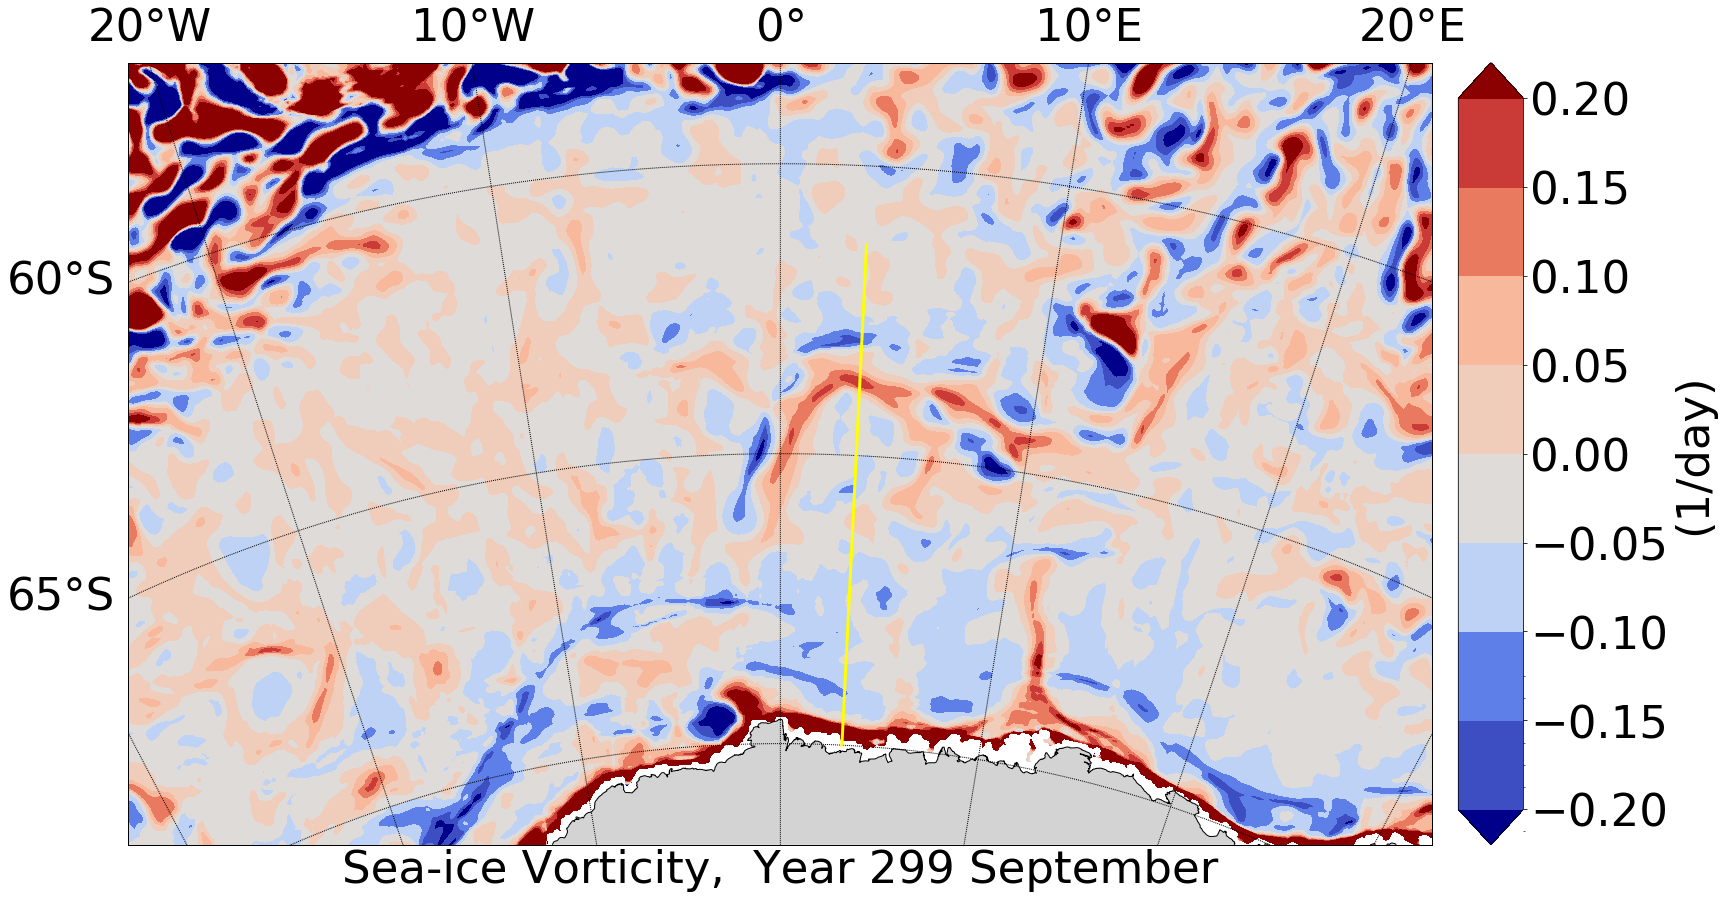

In [18]:
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2500000,height = 1500000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
CP = map.contourf(x,y,A3,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(1/day)', **my_font)
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea-ice Vorticity,  Year 299 September",**my_font)
plt.savefig("Sea-ice Vorticity 299-09.png",bbox_inches='tight')

In [19]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
        plotvar = data.variables['KMT'][:,:]

In [20]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/UVEL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]

In [21]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.z_w_bot.nc')
        plotvar2 = data.variables['z_w_bot'][:]

In [22]:
depth = plotvar2/100
num = np.arange(1,62)
for i in num: 
    plotvar[plotvar==i] = depth[i]

In [23]:
plotvar[plotvar==0] = -1
lontu[lontu ==-1] = np.nan
lattu[lattu ==-1] = np.nan
lontu[:,1089] = -1

In [24]:
lont2 = lontu[200:410,1130]
latt2 = lattu[200:410,1130]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'spacing'


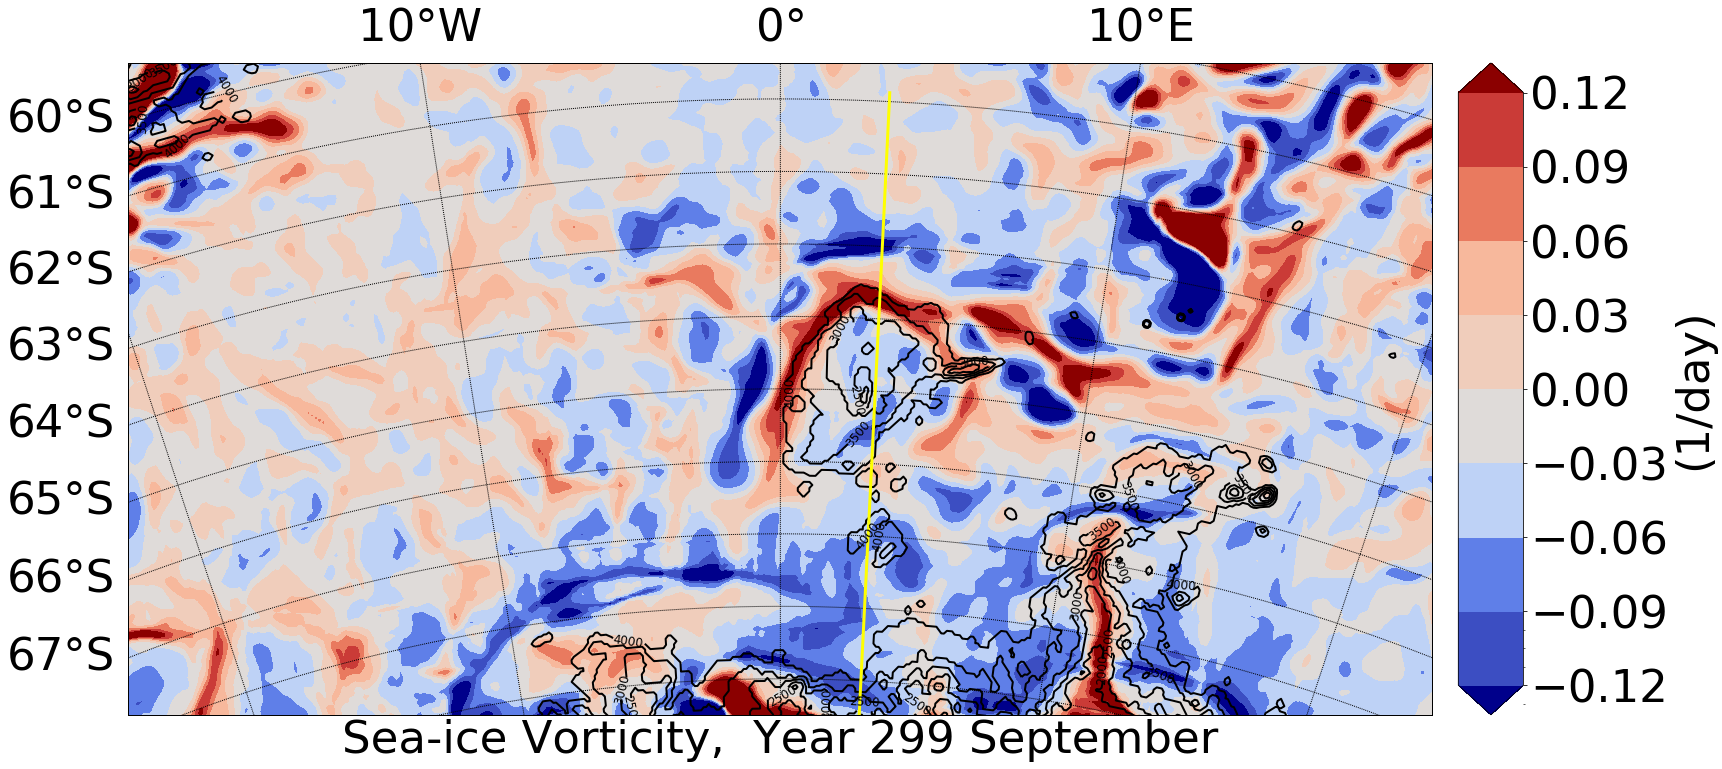

In [25]:
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-0.12,-0.09,-0.06,-0.03,0,0.03,0.06,0.09,0.12]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
nice_levels2 = [2000,2500,3000,3500,4000]
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
       
xq,yq=map(lontu,lattu)
  
CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=2)
plt.clabel(CS,fontsize=12,fmt='%4d')
CP = map.contourf(x,y,A3,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(1/day)', **my_font)
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea-ice Vorticity,  Year 299 September",**my_font)
plt.savefig("Sea-ice Vorticity 299-09.png",bbox_inches='tight')

In [26]:
re = np.loadtxt("ridgevelocity.out")
xx = np.loadtxt("ridgevelocityxx.out")
yy = np.loadtxt("ridgevelocityyy.out")

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: The following kwargs were not used by contour: 'spacing'


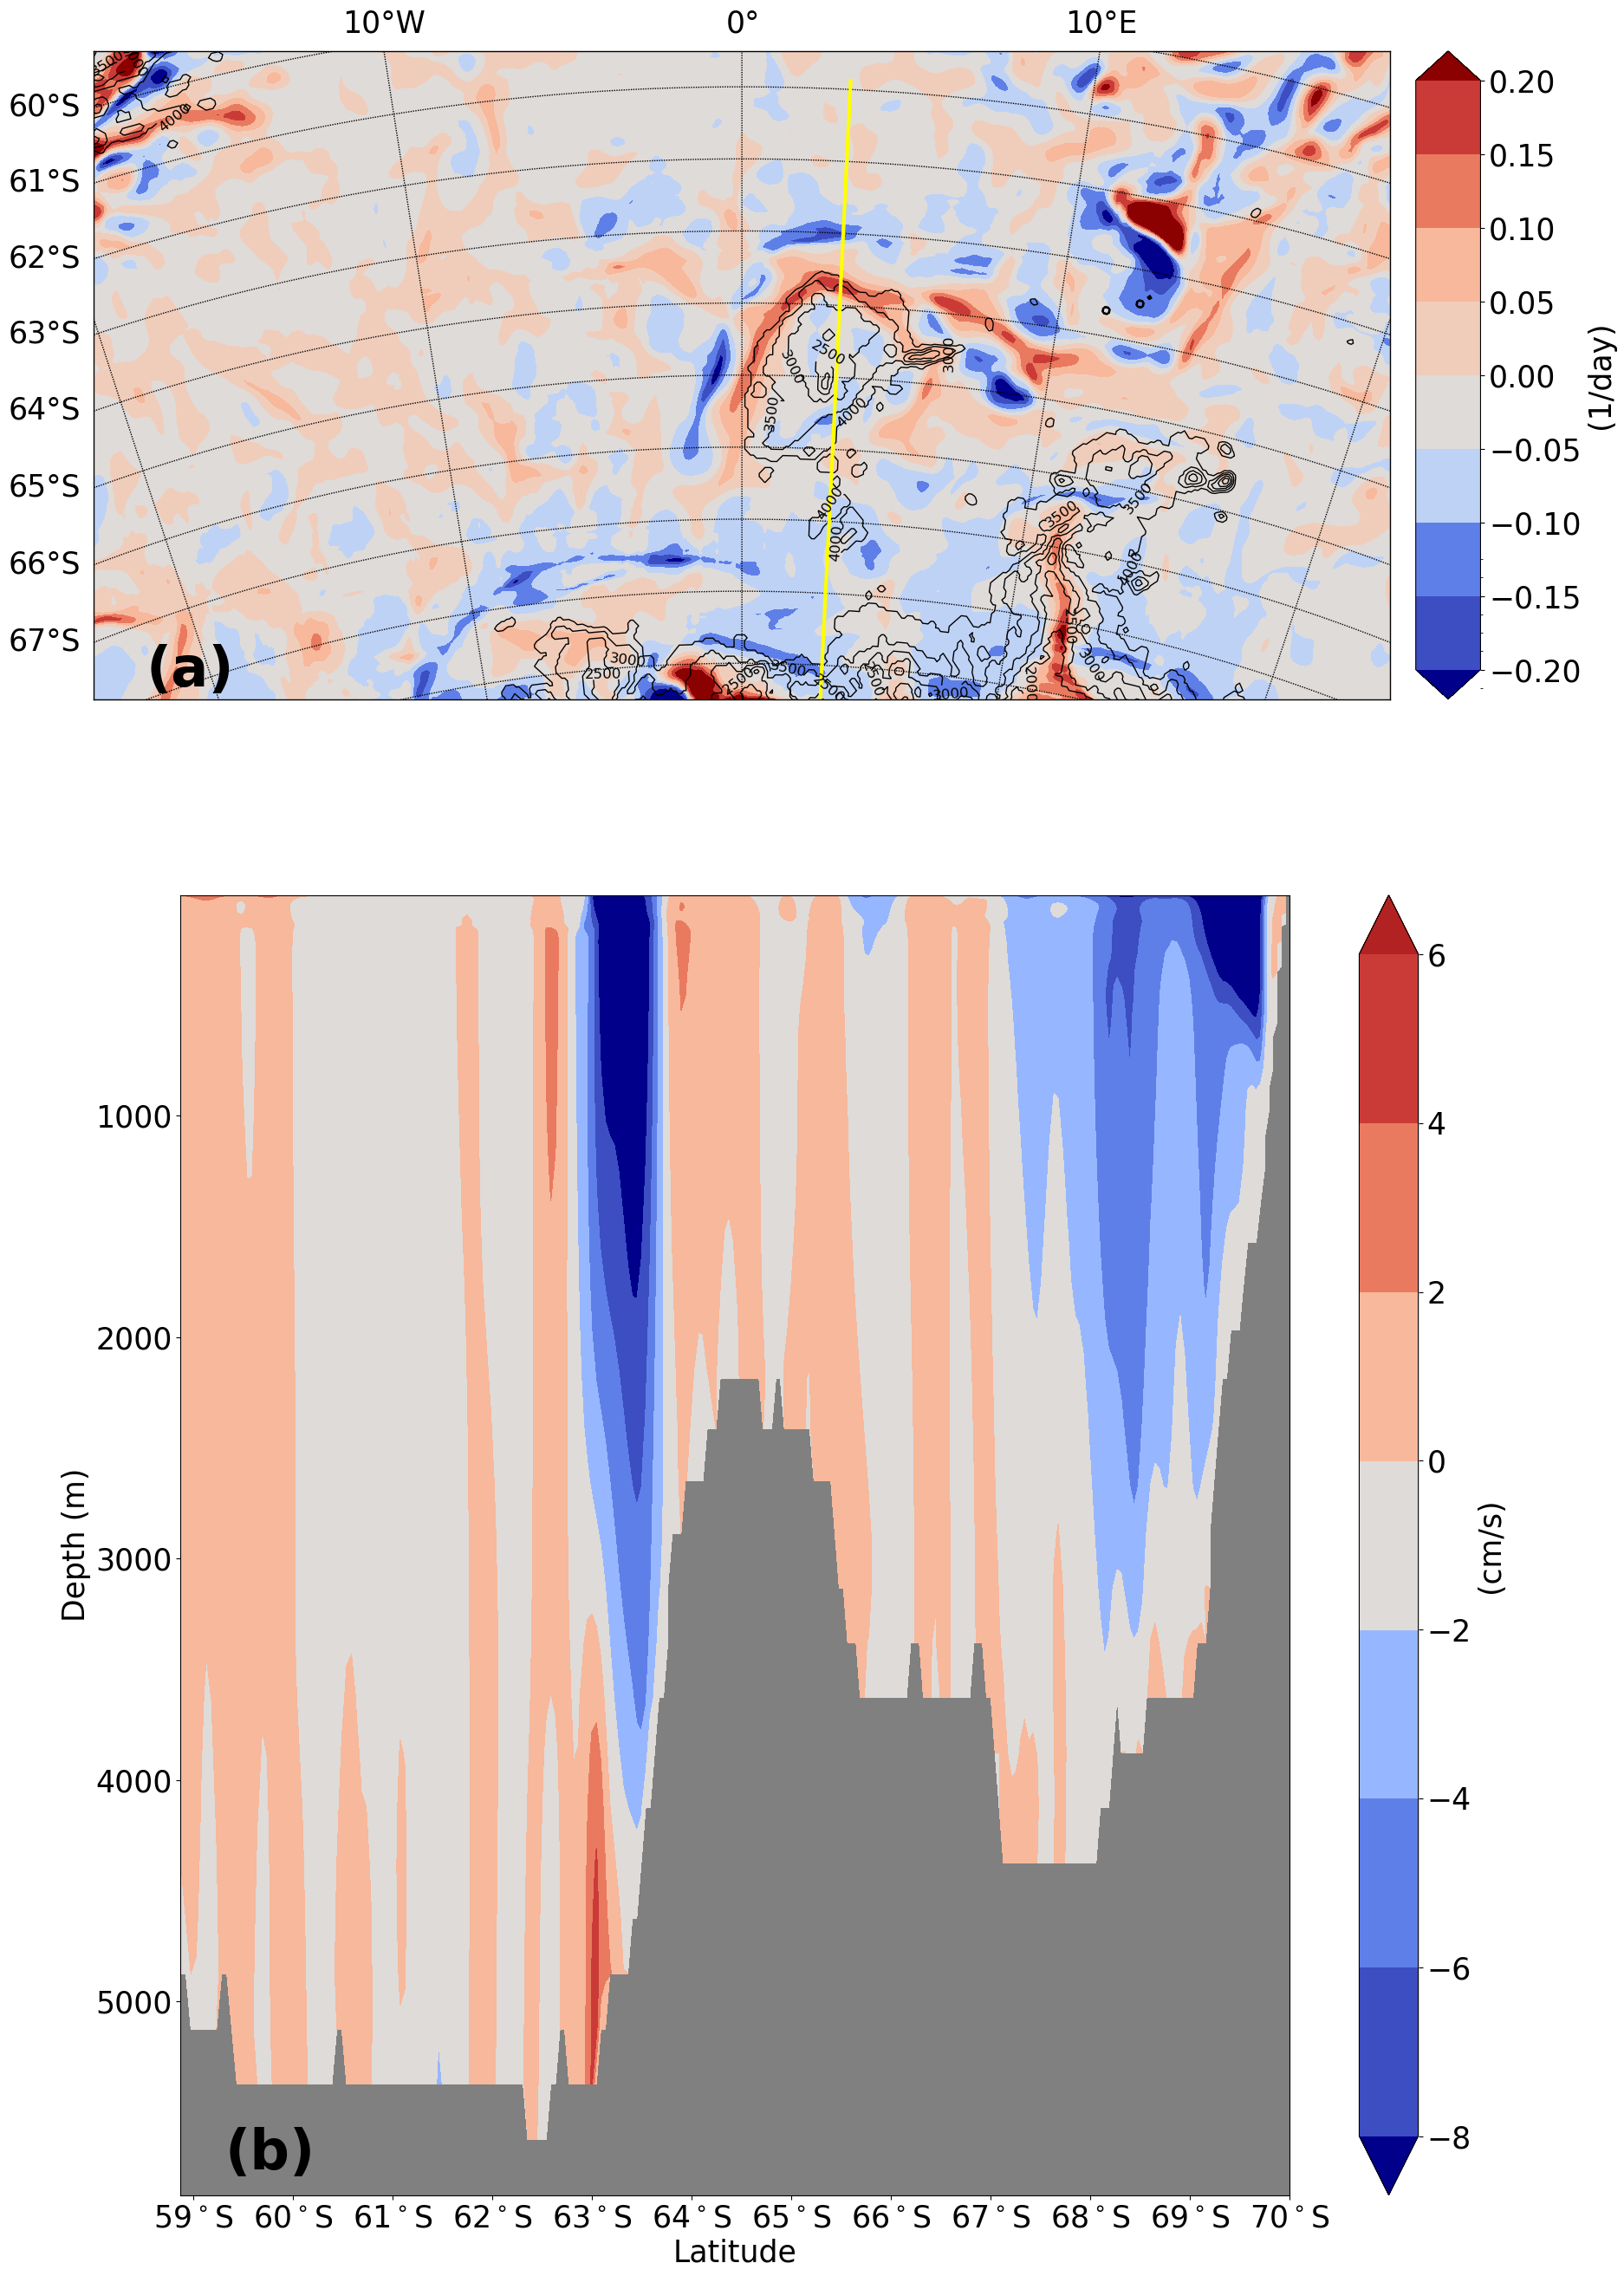

In [36]:

my_font = {'fontname':'Cambria', 'size':'25'}
##################################################################
fig = plt.figure(figsize=(20,30), dpi=100)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                    xticklabels=[])
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

#map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     #width = 2500000,height = 1500000,resolution ='h') 

map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
CP = map.contourf(x,y,A3,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')
xq,yq=map(lontu,lattu)
  
CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=1)
plt.clabel(CS,fontsize=12,fmt='%4d')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=25) 
cbar.set_label('(1/day)', **my_font)
#plt.title('(a)', fontsize=25)
#cbar.set_label('(1/day)', **my_font)
#plt.xlabel("(a)",**my_font)
ax1.text(0.04, 0.02, '(a)', transform=ax1.transAxes,size=46, weight='bold')
############################
ax2 = fig.add_axes([0.15, 0.4, 0.8, 0.5])
my_font = {'fontname':'Cambria', 'size':'25'}
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,70,100,130,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-8,-6,-4,-2,0,2,4,6]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

im = ax2.contourf(xx[:,200:450], yy[:,200:450], re[:,200:450],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax2.set_facecolor("gray")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:45,:], yy[:45,:], PD[:45,:],colors = 'black', linestyles = 'solid',linewidths=3)
#plt.clabel(CS,fontsize=20)
cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=25)
cbar.set_label('(cm/s)', **my_font)
#ax2.set_title('Mixed Layer Depth')
#############################################################################
plt.xticks(np.arange(-70,-58.5,1), ['70$^\circ$S','69$^\circ$S','68$^\circ$S','67$^\circ$S','66$^\circ$S','65$^\circ$S' ,'64$^\circ$S','63$^\circ$S','62$^\circ$S','61$^\circ$S', '60$^\circ$S','59$^\circ$S','62.5$^\circ$S' ,'410','430', '450','470','490'],**my_font)
plt.xticks(**my_font)
plt.yticks(**my_font)
ax2.invert_xaxis()
plt.xlabel('Latitude',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
#ax2.set_title('Zonal Velocity, 3$^\circ$E',**my_font)
#plt.title('(b)', fontsize=25)
ax2.text(0.04, 0.02, '(b)', transform=ax2.transAxes,size=46, weight='bold')
plt.savefig("290-2.png",bbox_inches='tight',dpi=fig.dpi)